# Where Do I fit into the Education Data

As a recent Neuroscience BS degree recipient I wanted to see how I fit into the most recent education data available. Let's look at the data from the 17/18 Academic Year.

https://nces.ed.gov/ipeds/use-the-data/download-access-database

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pywaffle import Waffle

In [112]:
cd \Users\alexa\Projects\IPEDS_2018-19_Provisional

C:\Users\alexa\Projects\IPEDS_2018-19_Provisional


In [113]:
#after creating csv from the access document, import the csv with the total number of degrees awarded in 18-19 academic year 
awards = pd.read_csv('C2018_A.txt', sep=",", header=None)
awards_description = "Awards/degrees conferred by program (6-digit CIP code), award level, race/ethnicity, and gender: July 1, 2017 to June 30, 2018"

In [114]:
# view data
awards

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,101161,1.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,101240,1.0,1,1,10,6,4,0,0,0,...,4,0,0,0,0,0,0,0,0,0
2,101295,1.0,1,1,2,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,101471,1.0,1,1,13,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101514,1.0,1,1,16,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541466,475495,99.0,1,19,103,11,92,0,0,0,...,64,1,0,1,2,0,2,0,0,0
1541467,475811,99.0,1,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1541468,481058,99.0,1,19,30,15,15,0,0,0,...,0,0,0,0,0,0,0,12,8,4
1541469,481401,99.0,1,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
#cut out unneeded columns and rename using variable names from the excel file in the original downloaded
awards = awards[list(np.arange(6))]
awards.columns = ("UNITID","CIPCODE","MAJORNUM","AWLEVEL","CTOTALT","CTOTALM")
awards

,UNITID,CIPCODE,MAJORNUM,AWLEVEL,CTOTALT,CTOTALM
0,101161,1.0,1,1,0,0
1,101240,1.0,1,1,10,6
2,101295,1.0,1,1,2,1
3,101471,1.0,1,1,13,13
4,101514,1.0,1,1,16,16
...,...,...,...,...,...,...
1541466,475495,99.0,1,19,103,11
1541467,475811,99.0,1,19,0,0
1541468,481058,99.0,1,19,30,15
1541469,481401,99.0,1,19,0,0


In [116]:
#see that awards are too high (# of bachelors degrees is closer to 2000000 per year in US)
sum(awards['CTOTALT'][awards['AWLEVEL']==5])

#learn about CIPCODEs and three tier classification system
#https://nces.ed.gov/ipeds/cipcode/browse.aspx?y=55

8438512

In [117]:
#create dataframe with only 2 digit CIP scores
awards_2dCIP = pd.DataFrame(columns = ("UNITID","CIPCODE","MAJORNUM","AWLEVEL","CTOTALT","CTOTALM"))

for n in np.arange(99):
    if n in awards['CIPCODE']:
        awards_2dCIP = pd.concat([awards_2dCIP, awards[awards.CIPCODE == n]])

In [118]:
#create dict of degrees in the dataset along with the relevant awards found inside
degrees = {'Associate\'s degree':3, 
           'Bachelor\'s degree':5, 
           'Master\'s degree':7, 
           'Doctor\'s degree - research/scholarship':17, 
           'Doctor\'s degree - professional practice':18,
            'Doctor\'s degree - other':19
          }

In [119]:
#get the number of US graduates with a associates, bachelors, graduate or doctorate degrees in the academic year 2017-18
US_associates_deg = awards_2dCIP['CTOTALT'][awards_2dCIP.AWLEVEL == degrees['Associate\'s degree']]
US_associates_deg_sum = sum(US_associates_deg)

US_bachelor_deg = awards_2dCIP['CTOTALT'][awards_2dCIP.AWLEVEL == degrees['Bachelor\'s degree']]
US_bachelor_deg_sum = sum(US_bachelor_deg)

US_graduate_deg = awards_2dCIP['CTOTALT'][awards_2dCIP.AWLEVEL == degrees['Master\'s degree']]
US_graduate_deg_sum = sum(US_graduate_deg)

US_doctorate_deg = awards_2dCIP['CTOTALT'][awards_2dCIP.AWLEVEL == degrees['Doctor\'s degree - research/scholarship']]
US_doctorate_deg = pd.concat([US_doctorate_deg, awards_2dCIP['CTOTALT'][awards_2dCIP.AWLEVEL == degrees['Doctor\'s degree - professional practice']]])
US_doctorate_deg = pd.concat([US_doctorate_deg, awards_2dCIP['CTOTALT'][awards_2dCIP.AWLEVEL == degrees['Doctor\'s degree - other']]])
US_doctorate_deg_sum = sum(US_doctorate_deg)

US_total_deg = pd.concat([US_doctorate_deg, US_graduate_deg, US_bachelor_deg, US_associates_deg])
US_total_deg_sum = sum(US_total_deg)

In [120]:
#check for mistakes by comparing my sum with the total number of degree holders in the dataset (AWLEVEL 12 = Degrees total)
sum(US_total_deg) == sum(awards_2dCIP['CTOTALT'][awards_2dCIP.AWLEVEL == 12])

True

In [121]:
# Summary of the previous variables
print('Associates degree recipients in the 2017-18 aceademic year: ' 
      + str(US_associates_deg_sum) + '\n'
      + 'Bachelors degree recipients in the 2017-18 aceademic year: ' 
      + str(US_bachelor_deg_sum) + '\n' 
      + 'Graduate degree recipients in the 2017-18 aceademic year: ' 
      + str(US_graduate_deg_sum) + '\n' 
      + 'Doctorate degree recipients in the 2017-18 aceademic year: ' 
      + str(US_doctorate_deg_sum) + '\n' 
      + 'Total number of degree recipients in the 2017-18 aceademic year: ' 
      + str(US_total_deg_sum))

Associates degree recipients in the 2017-18 aceademic year: 1050538
Bachelors degree recipients in the 2017-18 aceademic year: 2175248
Graduate degree recipients in the 2017-18 aceademic year: 842539
Doctorate degree recipients in the 2017-18 aceademic year: 187810
Total number of degree recipients in the 2017-18 aceademic year: 4256135


In [122]:
# Get the number of graduates with a neuroscience degree
me = 1
UT_neuro = sum(awards['CTOTALT'][awards.AWLEVEL == degrees['Bachelor\'s degree']][awards.CIPCODE == 26.1501][awards.UNITID == 228778]) 
total_bach_UT = sum(awards_2dCIP['CTOTALT'][awards_2dCIP.AWLEVEL == degrees['Bachelor\'s degree']][awards_2dCIP.UNITID == 228778])
total_neuro = sum(awards['CTOTALT'][awards.AWLEVEL == degrees['Bachelor\'s degree']][awards.CIPCODE == 26.1501])
total_bio = sum(awards['CTOTALT'][awards.AWLEVEL == degrees['Bachelor\'s degree']][awards.CIPCODE == 26])


In [123]:
df = pd.DataFrame({
    'degrees': ['me', 'UT Neuroscience Bachelors'],
    'number_of_cases': [me, UT_neuro-me]
})

One square is equal to 1 recent degree recipient


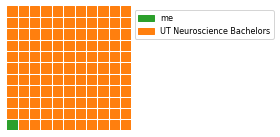

In [124]:
size = 4

fig = plt.figure(
    FigureClass=Waffle, 
    rows=int(math.sqrt(sum(df.number_of_cases))),
    columns=int(math.sqrt(sum(df.number_of_cases))),
    values=df.number_of_cases,
    labels=list(df.degrees),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'prop':{'size': size*2}},
    #icons='child', icon_size=18, 
    colors=('tab:green','tab:orange'),
    figsize=[size, size]
)
print('One square is equal to ' + str(me) + ' recent degree recipient')

In [105]:
df2 = pd.DataFrame({
    'degrees': ['me', 'UT Neuroscience Bachelors', 'US Neuroscience Bachelors'],
    'number_of_cases': [me, UT_neuro-me, total_neuro-UT_neuro]
})
df2

,degrees,number_of_cases
0,me,1
1,UT Neuroscience Bachelors,122
2,US Neuroscience Bachelors,6458


One square is equal to 1 recent degree recipient


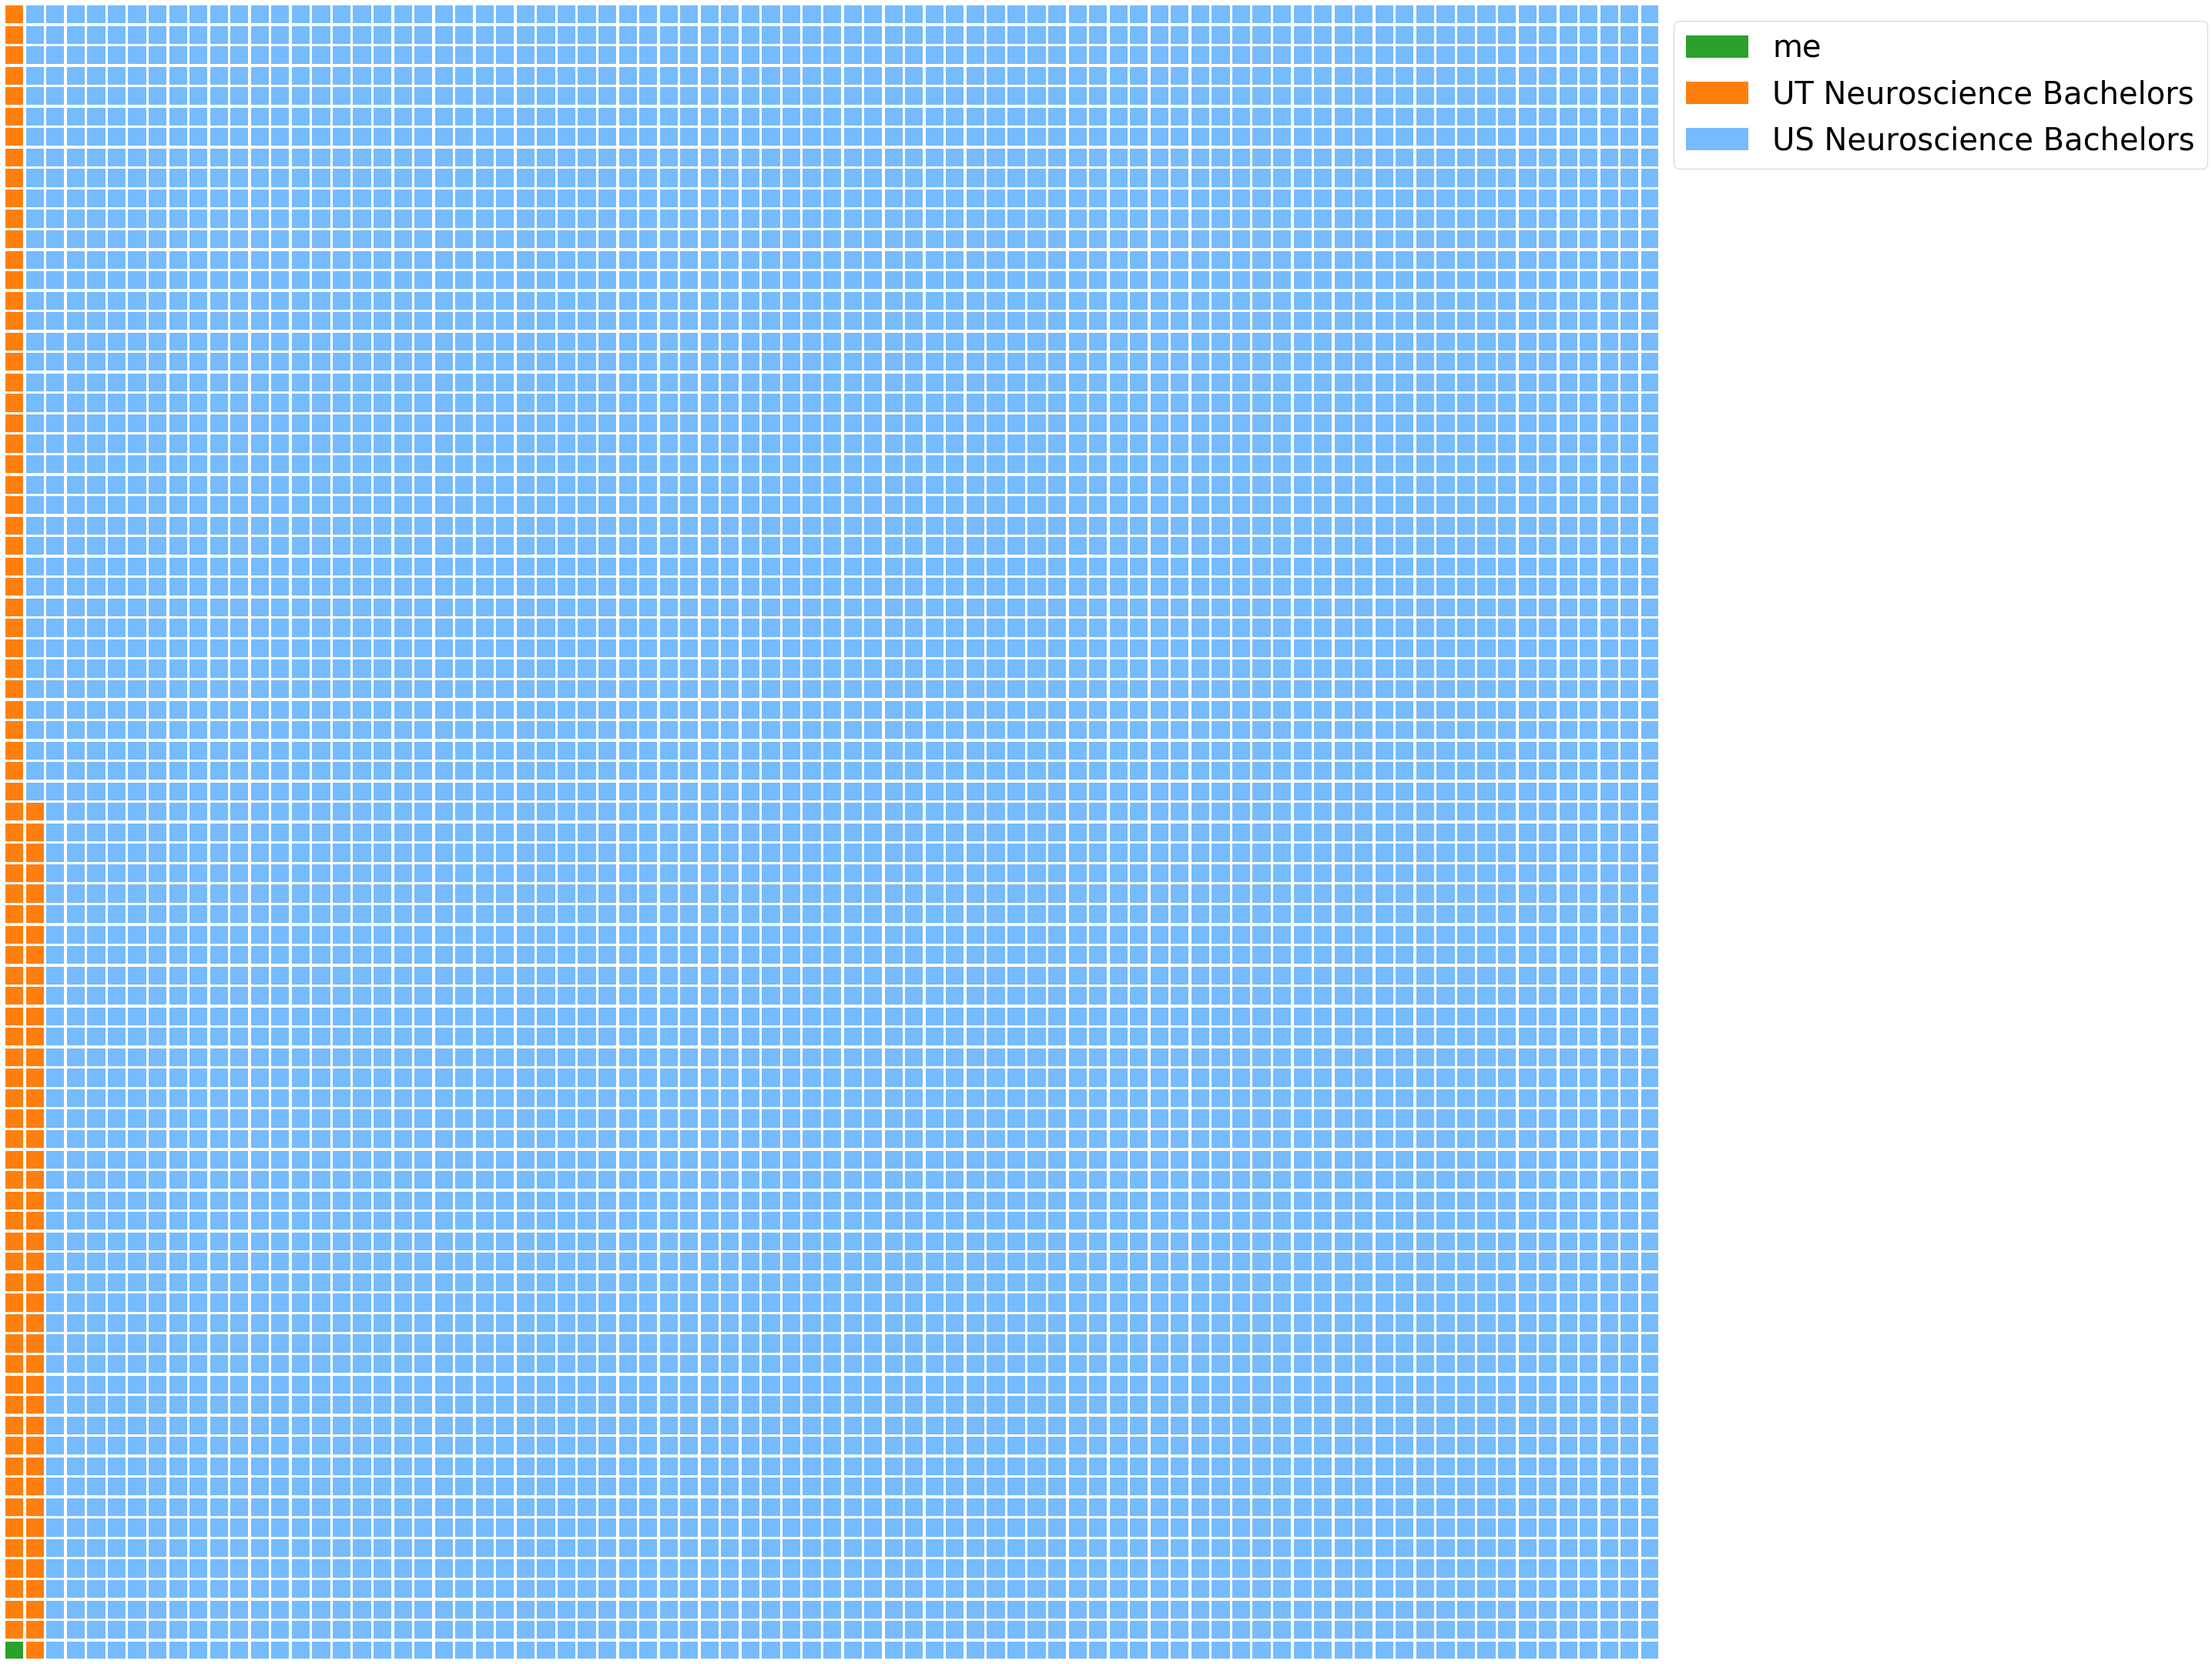

In [107]:
size = 40

fig = plt.figure(
    FigureClass=Waffle, 
    rows=int(math.sqrt(sum(df2.number_of_cases))),
    columns=int(math.sqrt(sum(df2.number_of_cases))),
    values=df2.number_of_cases,
    colors=('tab:green','tab:orange','xkcd:sky blue'),
    labels=list(df2.degrees),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'prop':{'size': size}},
    figsize=[size, size]
)
print('One square is equal to ' + str(me) + ' recent degree recipient')

colors: https://matplotlib.org/3.1.1/tutorials/colors/colors.html

waffle charts: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart

In [108]:
'''df2point5 = pd.DataFrame({
    'degrees': ['US Neuroscience Bachelors', 'US Biosciences', 'US Bachelors'],
    'number_of_cases': [UT_neuro, total_neuro-UT_neuro, US_bachelor_deg_sum-total_neuro-UT_neuro]
})
'''

"df2point5 = pd.DataFrame({\n    'degrees': ['UT Neuroscience Bachelors', 'US Neuroscience Bachelors', 'US Bachelors'],\n    'number_of_cases': [UT_neuro, total_neuro-UT_neuro, US_bachelor_deg_sum-total_neuro-UT_neuro]\n})\n"

In [104]:
df3 = pd.DataFrame({
    'degrees': ['UT Neuroscience Bachelors', 'US Neuroscience Bachelors', 'US Bachelors'],
    'number_of_cases': [UT_neuro, total_neuro-UT_neuro, US_bachelor_deg_sum-total_neuro-UT_neuro]
})
df3

,degrees,number_of_cases
0,UT Neuroscience Bachelors,123
1,US Neuroscience Bachelors,6458
2,US Bachelors,2168544


One square is equal to 123 recent degree recipients


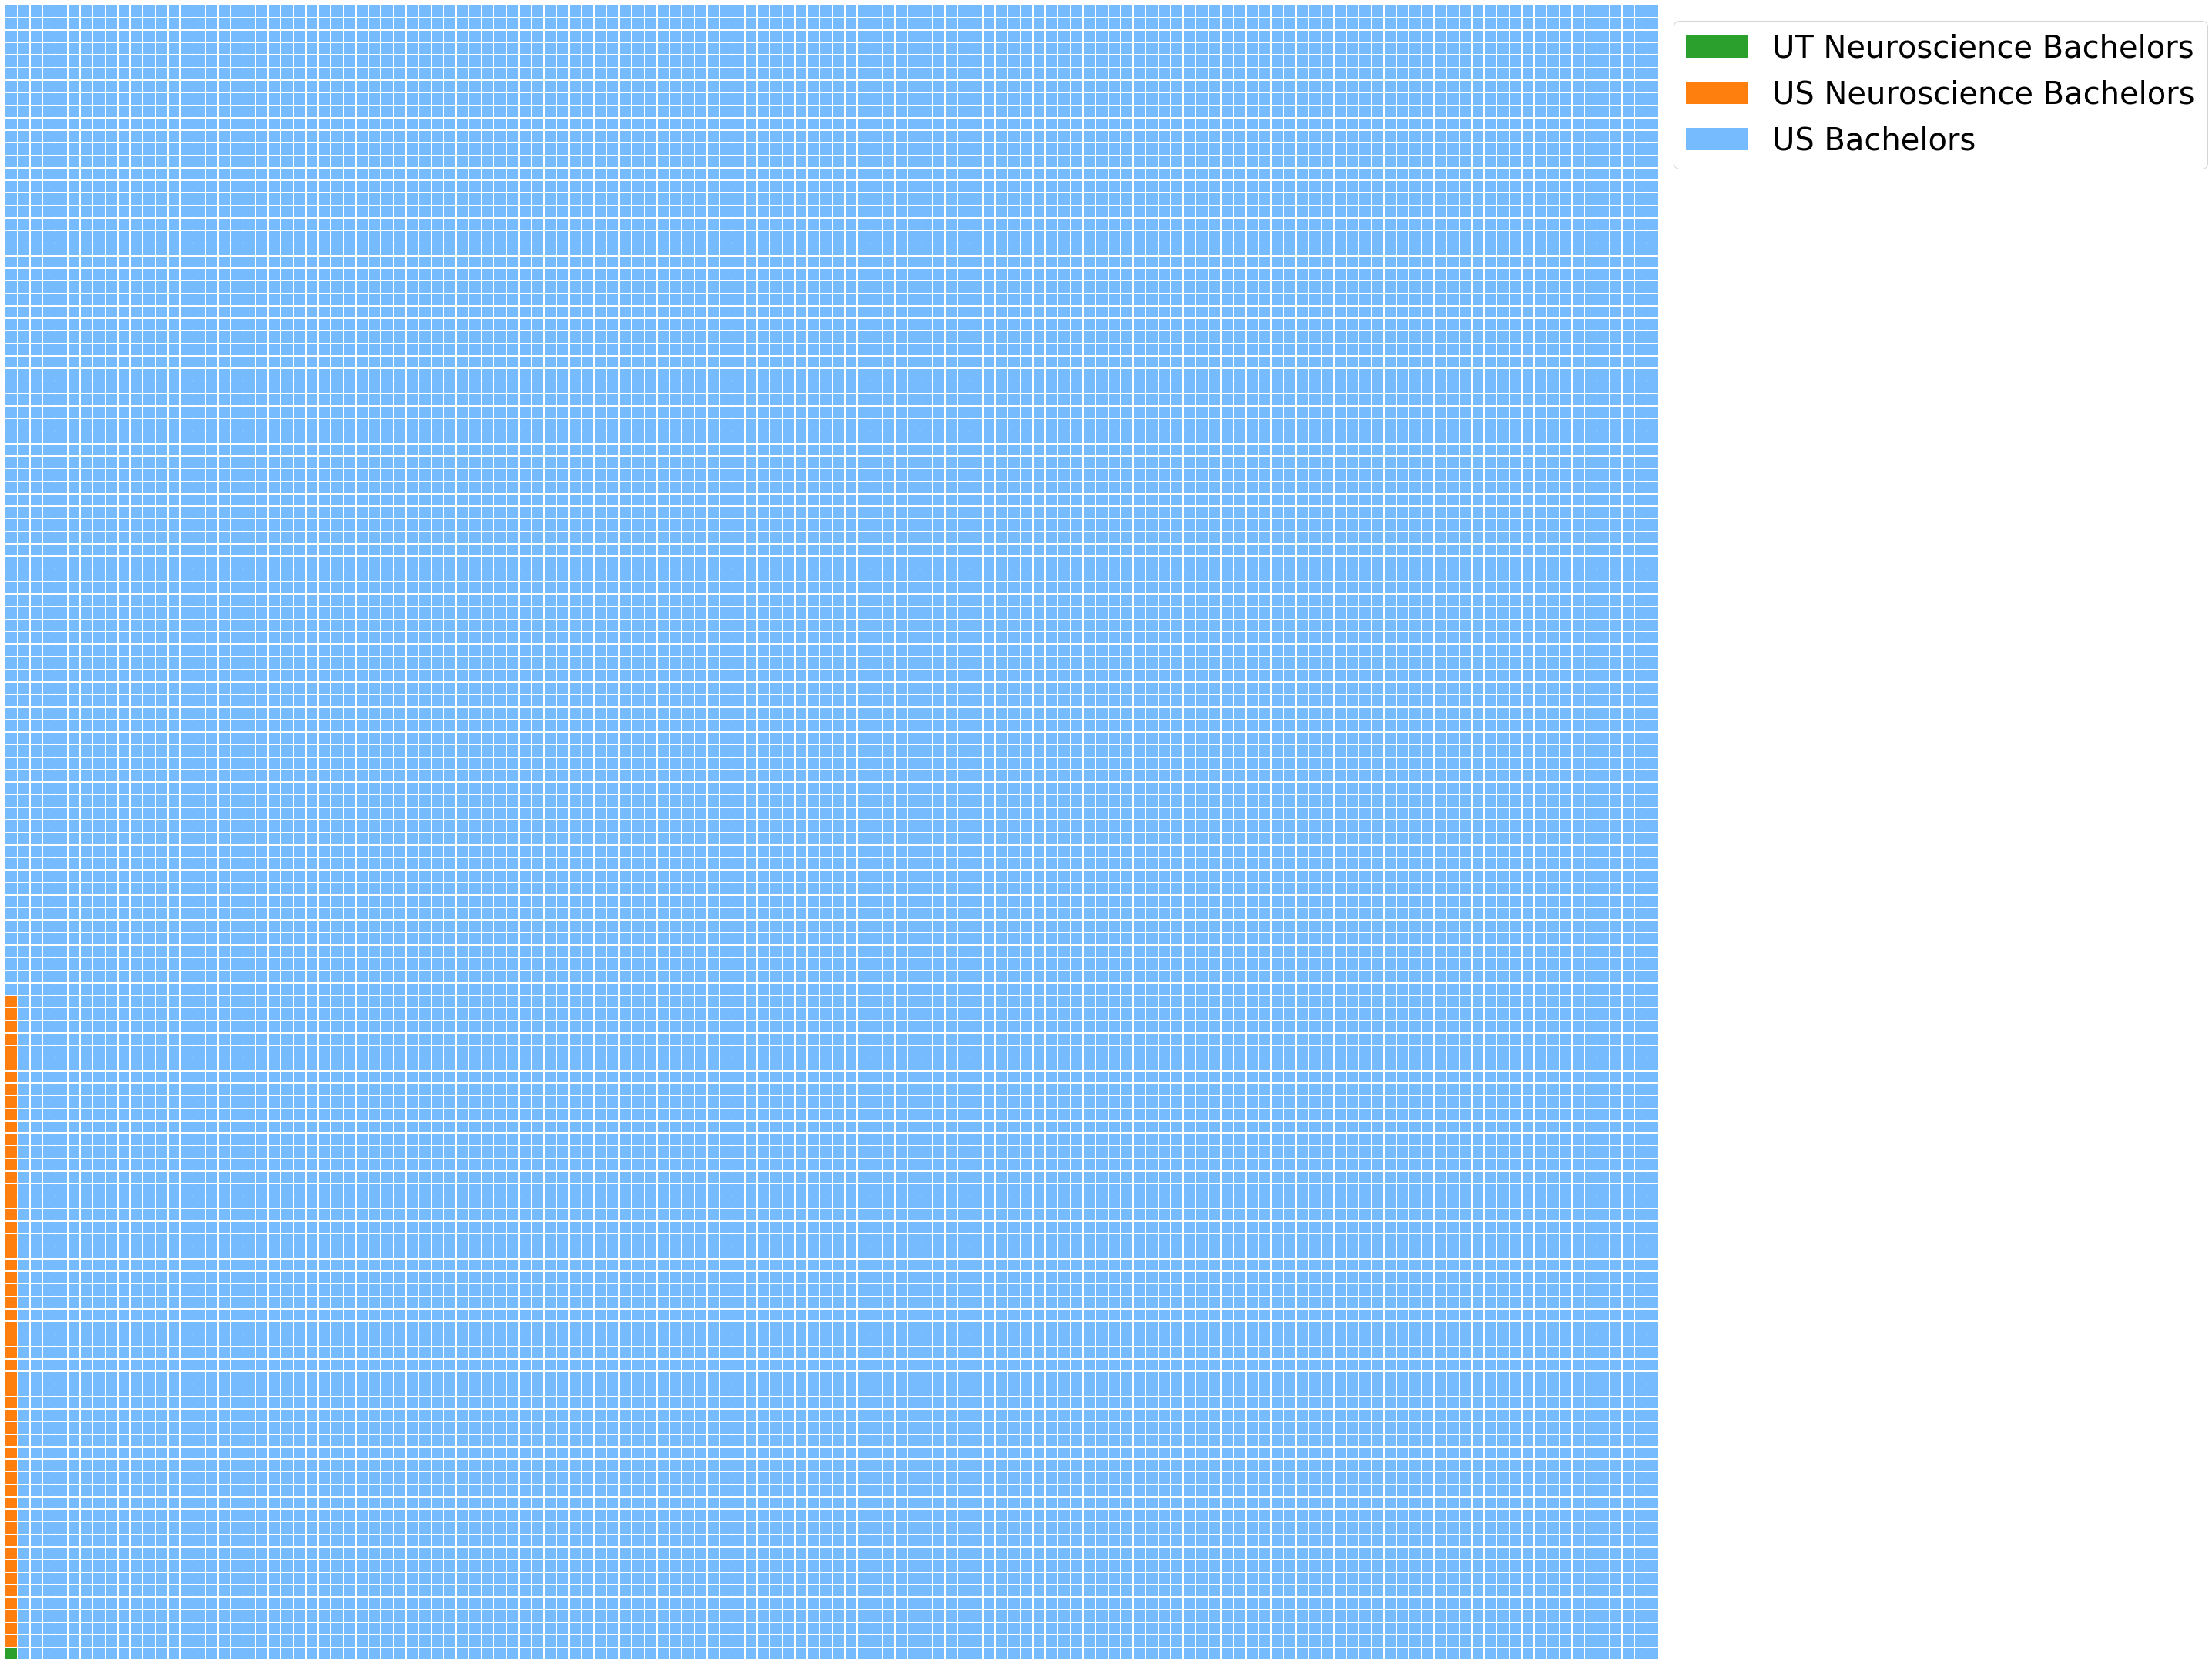

In [106]:
size = 40

fig = plt.figure(
    FigureClass=Waffle, 
    rows=int(math.sqrt(sum(df3.number_of_cases/UT_neuro))),
    columns=int(math.sqrt(sum(df3.number_of_cases/UT_neuro))),
    values=df3.number_of_cases/UT_neuro,
    colors=('tab:green','tab:orange','xkcd:sky blue'),
    labels=list(df3.degrees),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'prop':{'size': size}},
    figsize=[size, size]
)
print('One square is equal to ' + str(UT_neuro) + ' recent degree recipients')

In [96]:
df4 = pd.DataFrame({
    'degrees': ['US Neuroscience Bachelors', 'US Bachelors', 'Other US Degree Recipients'],
    'number_of_cases': [total_neuro, US_bachelor_deg_sum-total_neuro, US_total_deg_sum-US_bachelor_deg_sum]
})
df4

,degrees,number_of_cases
0,US Neuroscience Bachelors,6581
1,US Bachelors,2168667
2,Other US Degree Recipients,2080887


One square is equal to 6581 recent degree recipients


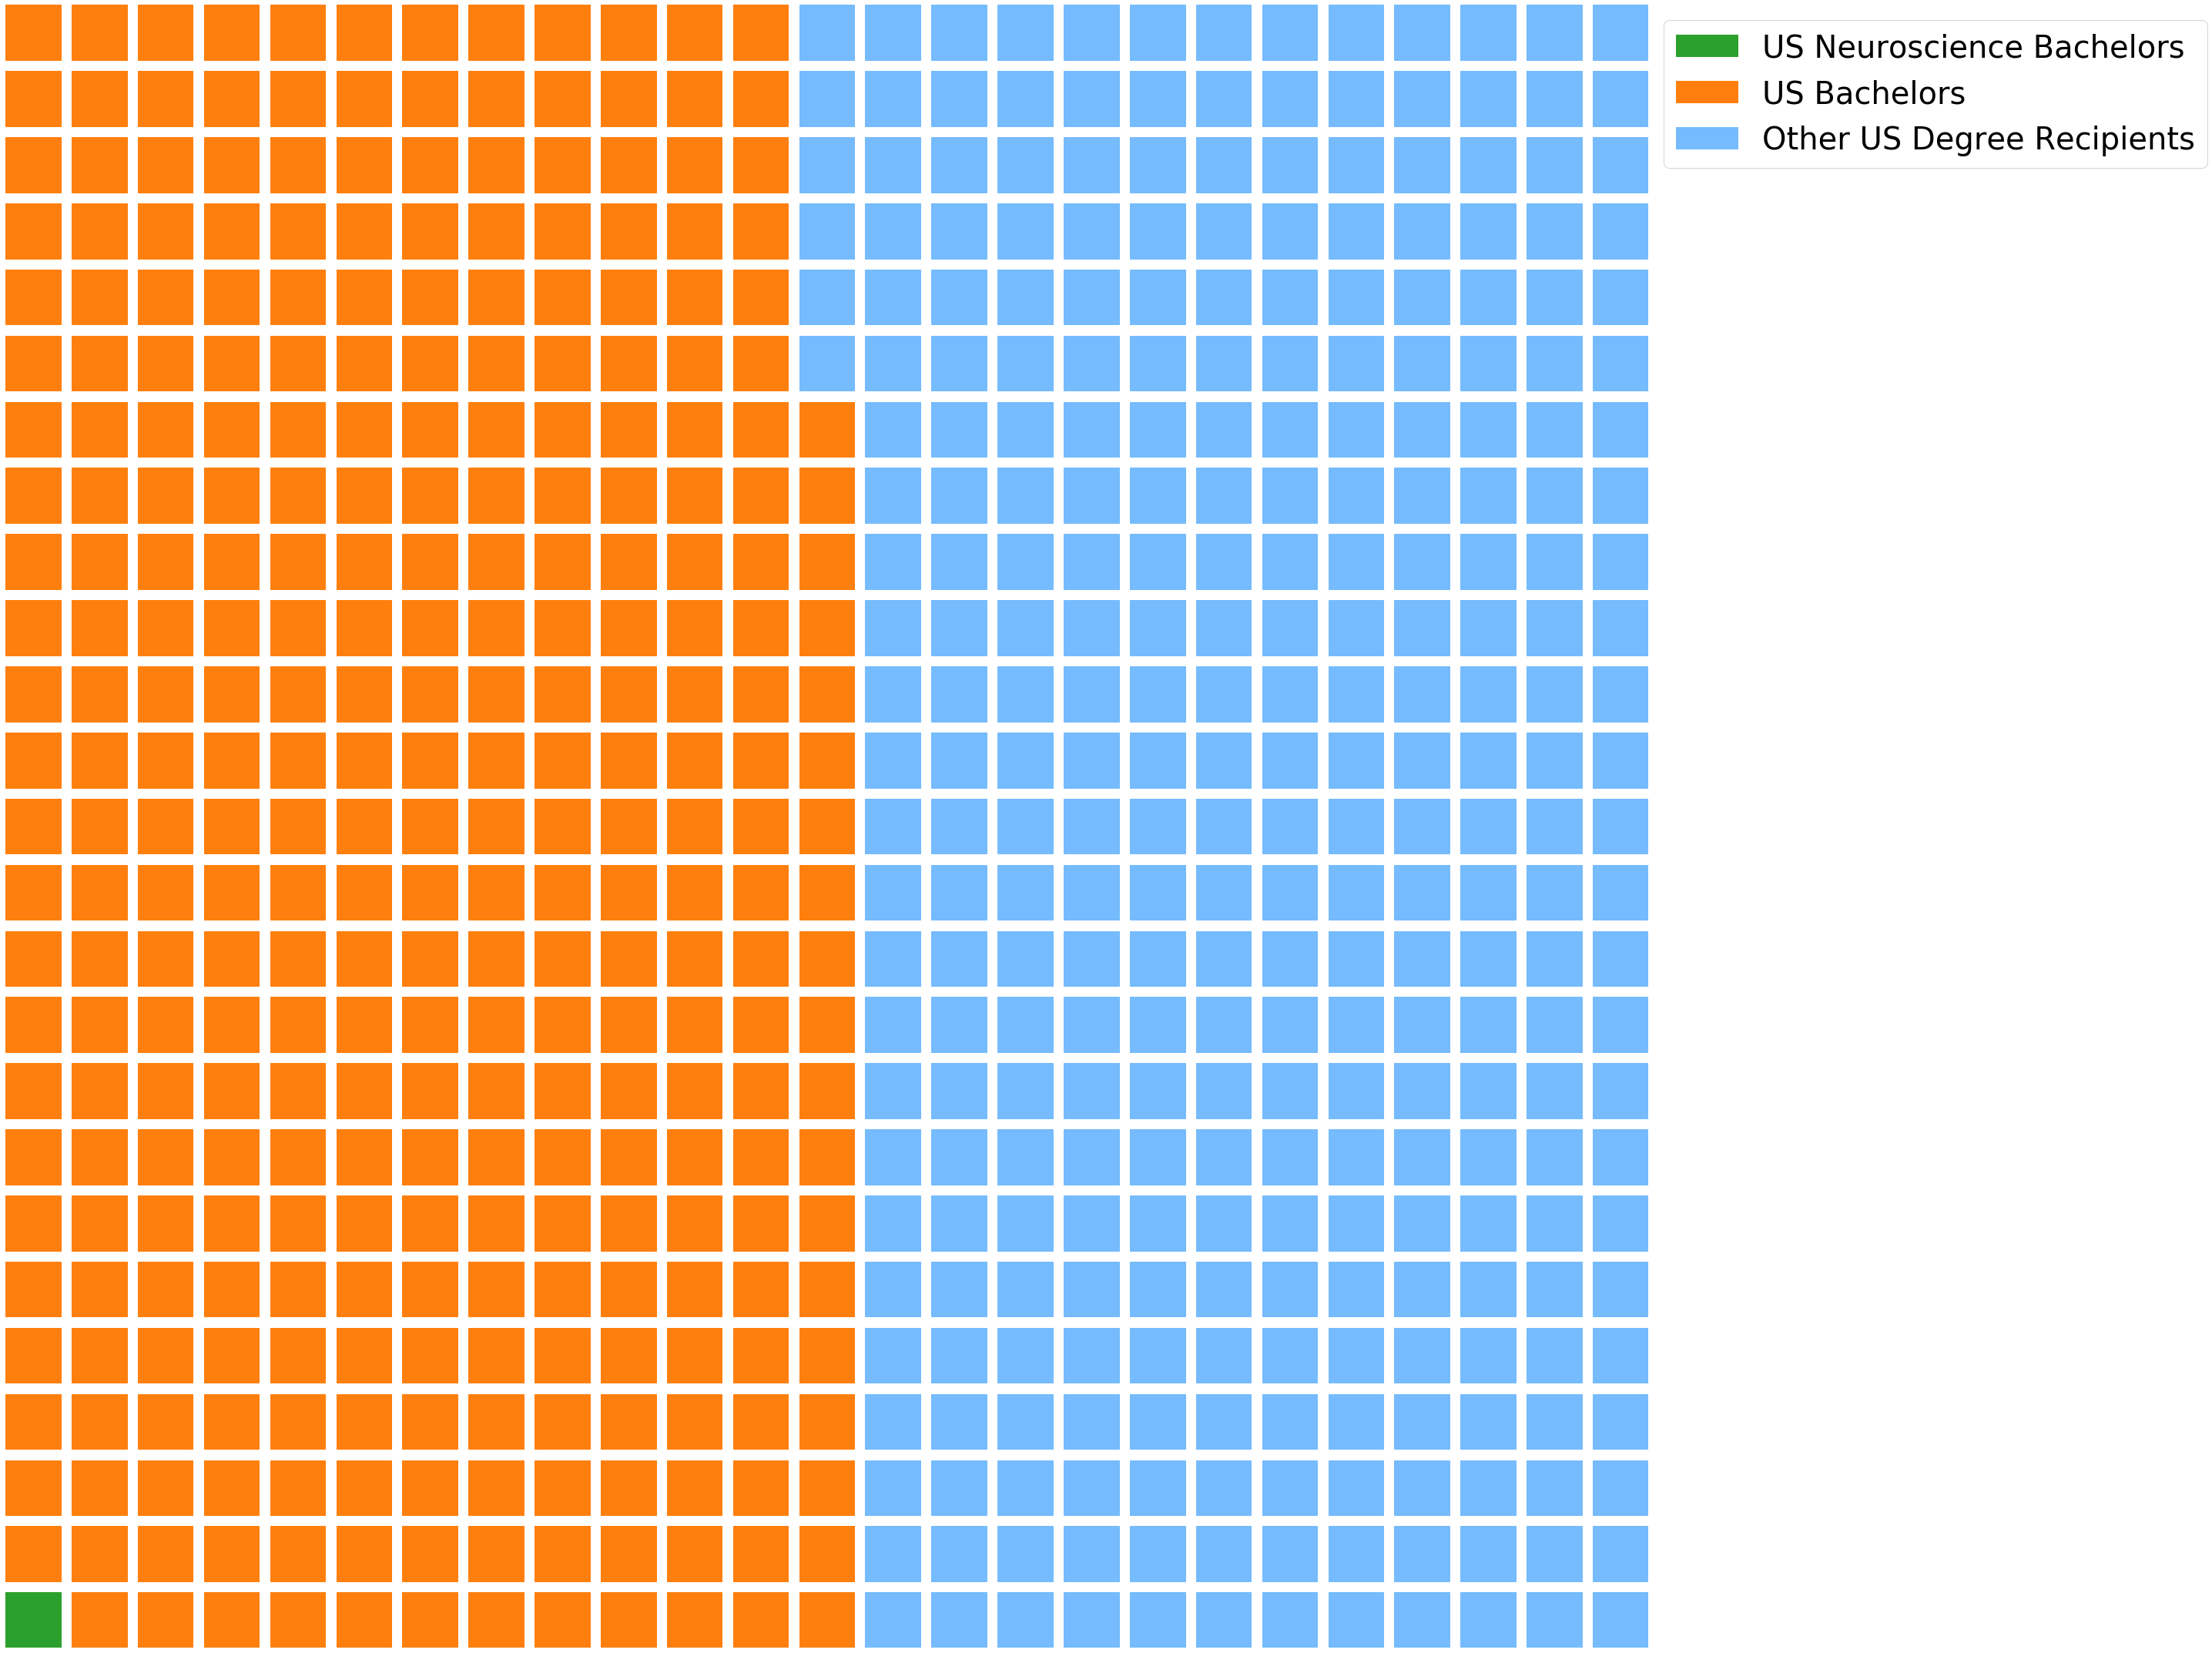

In [109]:
size = 40

fig = plt.figure(
    FigureClass=Waffle, 
    rows=int(math.sqrt(sum(df4.number_of_cases/total_neuro))),
    columns=int(math.sqrt(sum(df4.number_of_cases/total_neuro))),
    values=df4.number_of_cases/total_neuro,
    colors=('tab:green','tab:orange','xkcd:sky blue'),
    labels=list(df4.degrees),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'prop':{'size': size}},
    figsize=[size, size]
)
print('One square is equal to ' + str(total_neuro) + ' recent degree recipients')